<a href="https://colab.research.google.com/github/marlene271284/proyecto_integrado_2x/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Generar datos aleatorios para el DataFrame
num_filas = 100
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Sánchez", "Romero", "Díaz"]
nombres = ["Juan", "María", "Carlos", "Ana", "Pedro", "Laura", "Luis", "Marta", "Diego", "Sofía"]
datos = []

for _ in range(num_filas):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 15)
    datos.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,García,Laura,27166347,Lengua y Literatura,6,9,2,2
1,Pérez,Juan,83652609,Informática,3,2,6,9
2,García,Marta,95314814,Educación Física,4,9,1,3
3,Romero,Laura,96302360,Biología,2,7,3,5
4,Pérez,Sofía,41969038,Historia,6,8,5,6
...,...,...,...,...,...,...,...,...
95,Rodríguez,Laura,83703960,Matemática,4,4,10,8
96,Fernández,Carlos,36121209,Arte,6,1,8,14
97,Romero,Sofía,91623471,Biología,7,2,7,6
98,Fernández,Carlos,39890595,Música,8,4,8,8


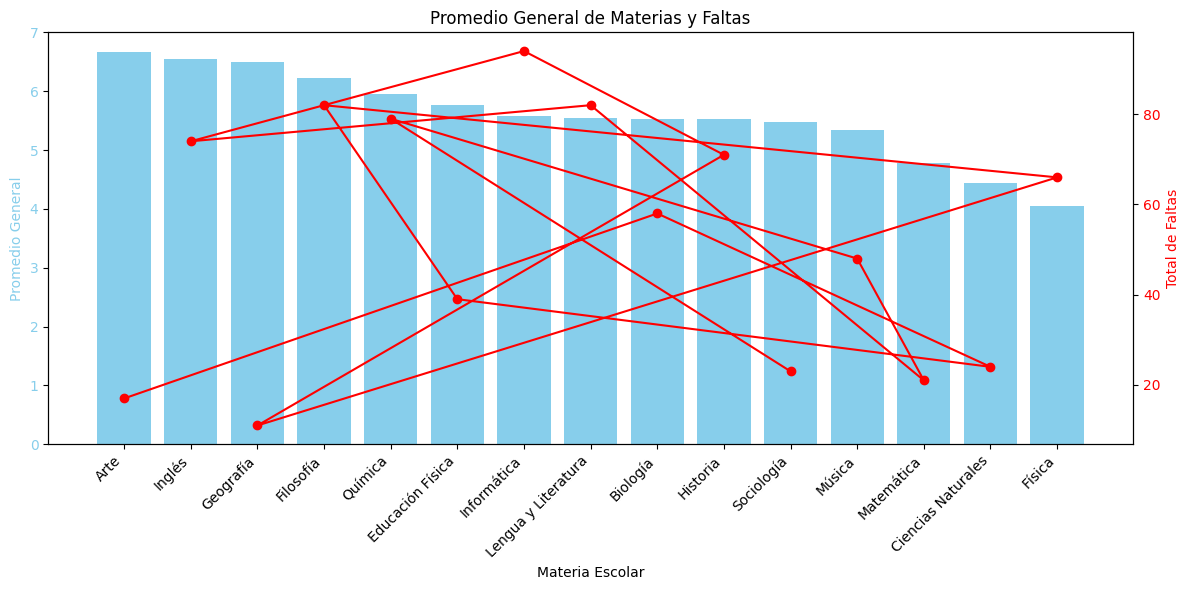

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby("Materia Escolar")[[
    "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"
]].mean().mean(axis=1).sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby("Materia Escolar")["Faltas a clases"].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio general de cada materia
ax1.bar(promedio_por_materia.index, promedio_por_materia.values, color="skyblue")
ax1.set_xlabel("Materia Escolar")
ax1.set_ylabel("Promedio General", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General de Materias y Faltas")
plt.xticks(rotation=45, ha="right")

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color="red", marker="o")
ax2.set_ylabel("Total de Faltas", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Ajustar el espaciado entre las barras
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [4]:
# prompt: df.to_csv("datos_alumnos.csv", index=False)

# Assuming you have already executed the code to create the DataFrame 'df'
# and you want to save it to a CSV file named "datos_alumnos.csv"

df.to_csv("datos_alumnos.csv", index=False)